# FINAL PROJECT CODE

## Imports

In [2]:
import pandas as pd
import numpy as np
import pickle
import re
import itertools
import scipy
import matplotlib.pyplot as plt
import re
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectPercentile, SelectKBest, SelectFpr, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split



## Read Data

In [3]:
df_train = pd.read_csv('dataset/training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')
df_test = pd.read_csv('dataset/test_set.tsv', sep='\t', encoding='ISO-8859-1')


In [12]:
df_test["weight"] = [0.5 if x == 2 else 1 for x in df_test['essay_set']]


In [47]:
df_train.dtypes

essay_id            int64
essay_set           int64
essay              object
rater1_domain1      int64
rater2_domain1      int64
rater3_domain1    float64
domain1_score       int64
rater1_domain2    float64
rater2_domain2    float64
domain2_score     float64
rater1_trait1     float64
rater1_trait2     float64
rater1_trait3     float64
rater1_trait4     float64
rater1_trait5     float64
rater1_trait6     float64
rater2_trait1     float64
rater2_trait2     float64
rater2_trait3     float64
rater2_trait4     float64
rater2_trait5     float64
rater2_trait6     float64
rater3_trait1     float64
rater3_trait2     float64
rater3_trait3     float64
rater3_trait4     float64
rater3_trait5     float64
rater3_trait6     float64
dtype: object

## Insights of the data

Knowledge right now:
- essay two has two domain scoring
- Each essay set may have different scoring criteria (out of 5 or 10 or 50) ## this is a problem##
- rater traits on essay set 7-8 (may need to check relevanncy)
- Domain score is sum total of raters scores


Text(0, 0.5, 'max score')

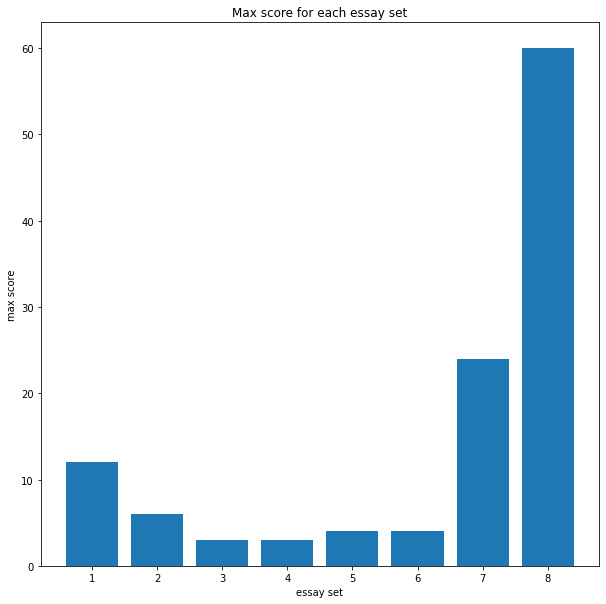

In [5]:
fig,ax = plt.subplots(figsize = (10,10))
maxScore = df_train.groupby(["essay_set"], as_index = False).agg("max")[["essay_set", "domain1_score"]]
ax.bar(maxScore["essay_set"], maxScore["domain1_score"])
ax.set_title("Max score for each essay set")
ax.set_xlabel("essay set")
ax.set_ylabel("max score")

Needs to normalize the data. Considers dividing the scores by the max value, or use logit link to make it under 0 to 1 for every data respective to each maximum.

In [8]:
def essaySetDistribution(df, essay_set):
    temp =  df.loc[ df["essay_set"] == essay_set].groupby(["domain1_score"], as_index = False).agg("count")
    plt.bar(temp["domain1_score"], temp["essay_id"])
    plt.show()

Possible to implement bell curve

In [6]:
ESSAY_SET = [1,2,3,4,5,6,7,8]

for sets in ESSAY_SET:
    temp_df =   df_train.loc[ df_train["essay_set"] == sets]
    print(temp_df.head())
    if(sets == 7 or sets == 8):
        #feature selection here or to see how relevant is the meta features

SyntaxError: unexpected EOF while parsing (<ipython-input-6-8330cd84f9db>, line 7)

## Data Cleaning

In [58]:
#very inefficient coding
df_train = df_train.fillna(0)

df_train["weight1"] = [0.5 if x == 2 else 1 for x in df_train['essay_set']]
df_train["weight2"] = abs(1 - df_train["weight1"]) 
df_train["total_score"] = df_train["domain1_score"]*df_train["weight1"] + df_train["domain2_score"]*df_train["weight2"]

final = []
regex = re.compile('@(\w+)', re.S)
for i in range(0, len(df_train)):
    word = df_train["essay"][i]
    temp = regex.sub(lambda m: re.sub("\d", "", m.group()), word)
    final.append(temp)
df_train["essay"] = pd.Series(np.array(final))
final_df = df_train[["essay_id", "essay_set", "essay","rater1_domain1" , "rater2_domain1"  , "rater3_domain1"  ,"domain1_score" ,    "rater1_domain2" ,   "rater2_domain2" ,   "domain2_score" ,  "total_score"]]
final_df.to_csv("clean_ver-1.csv")